In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df = pd.read_excel('Dataset.xlsx')

## Find the dimensions of the dataset

In [78]:
df.shape

(143998, 84)

## Look at first few records of the dataset

In [79]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,62052,47313,39653,12517,17,105023,4,0,1398,0,...,0.0,0.0,0,0,0.0,0.0,0,0,1,DrDoS_UDP
1,45811,108064,34181,31659,17,1,2,0,750,0,...,0.0,0.0,0,0,0.0,0.0,0,0,1,DrDoS_UDP
2,160730,686572,12187,31075,6,101,2,2,0,0,...,0.0,0.0,0,0,0.0,0.0,0,0,1,Syn
3,25914,101439,50534,14726,17,1,2,0,802,0,...,0.0,0.0,0,0,0.0,0.0,0,0,1,DrDoS_UDP
4,71113,68209,672,14634,17,3,2,0,2944,0,...,0.0,0.0,0,0,0.0,0.0,0,0,1,DrDoS_UDP


In [80]:
df["Protocol"].unique()

array([17,  6,  0], dtype=int64)

## Look at the feature names

In [81]:
list(df.columns)

['Unnamed: 0.1',
 'Unnamed: 0',
 'Source Port',
 'Destination Port',
 'Protocol',
 'Flow Duration',
 'Total Fwd Packets',
 'Total Backward Packets',
 'Total Length of Fwd Packets',
 'Total Length of Bwd Packets',
 'Fwd Packet Length Max',
 'Fwd Packet Length Min',
 'Fwd Packet Length Mean',
 'Fwd Packet Length Std',
 'Bwd Packet Length Max',
 'Bwd Packet Length Min',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Flow Bytes/s',
 'Flow Packets/s',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Total',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Total',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd PSH Flags',
 'Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'Fwd Header Length',
 'Bwd Header Length',
 'Fwd Packets/s',
 'Bwd Packets/s',
 'Min Packet Length',
 'Max Packet Length',
 'Packet Length Mean',
 'Packet Length Std',
 'Packet Length Variance',
 'FIN Flag Count',
 'SYN Flag Count',


## Look at the data types of the features

In [82]:
df.dtypes

Unnamed: 0.1          int64
Unnamed: 0            int64
Source Port           int64
Destination Port      int64
Protocol              int64
                     ...   
Idle Std            float64
Idle Max              int64
Idle Min              int64
Inbound               int64
Label                object
Length: 84, dtype: object

In [83]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143998 entries, 0 to 143997
Data columns (total 84 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0.1                 143998 non-null  int64  
 1   Unnamed: 0                   143998 non-null  int64  
 2   Source Port                  143998 non-null  int64  
 3   Destination Port             143998 non-null  int64  
 4   Protocol                     143998 non-null  int64  
 5   Flow Duration                143998 non-null  int64  
 6   Total Fwd Packets            143998 non-null  int64  
 7   Total Backward Packets       143998 non-null  int64  
 8   Total Length of Fwd Packets  143998 non-null  int64  
 9   Total Length of Bwd Packets  143998 non-null  int64  
 10  Fwd Packet Length Max        143998 non-null  int64  
 11  Fwd Packet Length Min        143998 non-null  int64  
 12  Fwd Packet Length Mean       143998 non-null  float64
 13 

In [84]:
df["Label"].unique()

array(['DrDoS_UDP', 'Syn', 'BENIGN'], dtype=object)

 ## Look at statistical summary of the features

In [85]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0.1,143998.0,1.066358e+05,8.255129e+04,0.0,36701.25,73044.5,176372.75,1.642831e+06
Unnamed: 0,143998.0,2.143339e+05,2.291714e+05,0.0,46424.25,93329.5,371645.50,8.027950e+05
Source Port,143998.0,3.841346e+04,1.701889e+04,0.0,27823.25,41141.5,52029.00,6.553200e+04
Destination Port,143998.0,3.282292e+04,1.909192e+04,0.0,16291.00,33058.0,49328.75,6.553500e+04
Protocol,143998.0,1.163243e+01,5.502481e+00,0.0,6.00,17.0,17.00,1.700000e+01
...,...,...,...,...,...,...,...,...
Idle Mean,143998.0,3.557437e+06,7.543524e+06,0.0,0.00,0.0,0.00,1.166865e+08
Idle Std,143998.0,1.309227e+06,3.212354e+06,0.0,0.00,0.0,0.00,5.727195e+07
Idle Max,143998.0,5.566877e+06,1.197704e+07,0.0,0.00,0.0,0.00,1.166865e+08
Idle Min,143998.0,2.237647e+06,4.968839e+06,0.0,0.00,0.0,0.00,1.166865e+08


In [86]:
numeric_features = list(df.select_dtypes("float64").columns)
categorical_features = list(df.select_dtypes("int64").columns)
target = "Label"
print(f'numeric_features:\n{numeric_features}\n\ncategorical_features:\n{categorical_features}\n\ntarget:\n{target}')

numeric_features:
['Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Fwd IAT Mean', 'Fwd IAT Std', 'Bwd IAT Mean', 'Bwd IAT Std', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Active Mean', 'Active Std', 'Idle Mean', 'Idle Std']

categorical_features:
['Unnamed: 0.1', 'Unnamed: 0', 'Source Port', 'Destination Port', 'Protocol', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', '

 ## Look for missing values in the features

In [87]:

np.round(df.isnull().mean() * 100,1)

Unnamed: 0.1        0.0
Unnamed: 0          0.0
Source Port         0.0
Destination Port    0.0
Protocol            0.0
                   ... 
Idle Std            0.0
Idle Max            0.0
Idle Min            0.0
Inbound             0.0
Label               0.0
Length: 84, dtype: float64

## Looking at relative frequencies of values of categorical features

In [88]:
for i in categorical_features:
    print(f'{i}\n{np.round((df[i].value_counts() / df[i].value_counts().sum()) * 100,2)}')

Unnamed: 0.1
Unnamed: 0.1
62052     0.0
53949     0.0
164488    0.0
55532     0.0
165661    0.0
         ... 
144531    0.0
165634    0.0
29673     0.0
5018      0.0
198296    0.0
Name: count, Length: 143998, dtype: float64
Unnamed: 0
Unnamed: 0
10        0.0
8         0.0
6         0.0
20        0.0
23        0.0
         ... 
75246     0.0
22706     0.0
73093     0.0
775869    0.0
519670    0.0
Name: count, Length: 137055, dtype: float64
Source Port
Source Port
672      2.75
80       0.12
443      0.11
50079    0.05
0        0.04
         ... 
11618    0.00
62632    0.00
59215    0.00
10127    0.00
12806    0.00
Name: count, Length: 57535, dtype: float64
Destination Port
Destination Port
53       0.39
137      0.37
80       0.31
443      0.24
49153    0.13
         ... 
24361    0.00
18222    0.00
13555    0.00
40970    0.00
58728    0.00
Name: count, Length: 46526, dtype: float64
Protocol
Protocol
17    51.23
6     48.73
0      0.04
Name: count, dtype: float64
Flow Duration
Flow Dur

## Looking at distributions of numeric features

C:\Users\hp\AppData\Local\Temp\ipykernel_8028\2397912466.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[(df['Label']=='Syn'),
C:\Users\hp\AppData\Local\Temp\ipykernel_8028\2397912466.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[(df['Label']=='BENIGN'),


Text(0, 0.5, 'Probability Density')

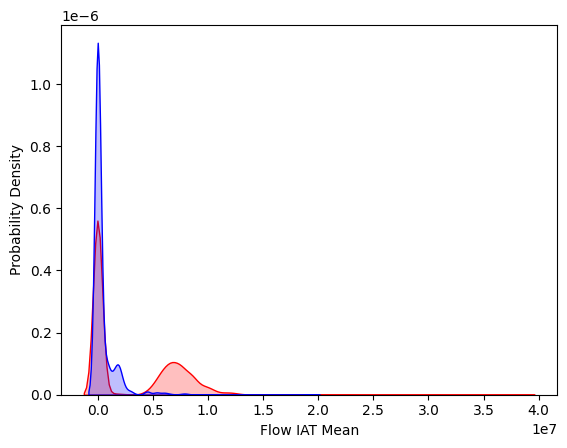

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.kdeplot(df.loc[(df['Label']=='Syn'),
            'Flow IAT Mean'], color='r', shade=True, label='Syn')
 
sns.kdeplot(df.loc[(df['Label']=='BENIGN'), 
            'Flow IAT Mean'], color='b', shade=True, label='BENIGN')
 
plt.xlabel('Flow IAT Mean')
plt.ylabel('Probability Density')

C:\Users\hp\AppData\Local\Temp\ipykernel_8028\392898261.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.loc[(data['Label']=='Syn'),
C:\Users\hp\AppData\Local\Temp\ipykernel_8028\392898261.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.loc[(data['Label']=='BENIGN'),


Text(0, 0.5, 'Probability Density')

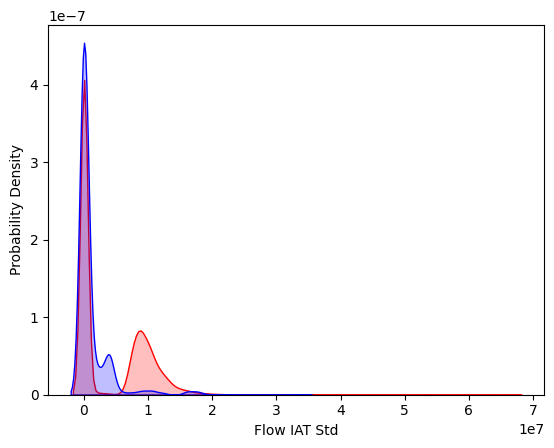

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.kdeplot(data.loc[(data['Label']=='Syn'),
            'Flow IAT Std'], color='r', shade=True, label='Syn')
 
sns.kdeplot(data.loc[(data['Label']=='BENIGN'), 
            'Flow IAT Std'], color='b', shade=True, label='BENIGN')
 
plt.xlabel('Flow IAT Std')
plt.ylabel('Probability Density')

C:\Users\hp\AppData\Local\Temp\ipykernel_8028\1397102292.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[(df['Label']=='Syn'),
C:\Users\hp\AppData\Local\Temp\ipykernel_8028\1397102292.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[(df['Label']=='BENIGN'),


Text(0, 0.5, 'Probability Density')

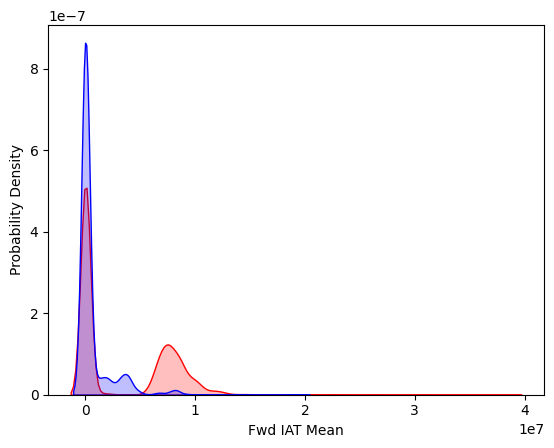

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.kdeplot(df.loc[(df['Label']=='Syn'),
            'Fwd IAT Mean'], color='r', shade=True, label='Syn')
 
sns.kdeplot(df.loc[(df['Label']=='BENIGN'), 
            'Fwd IAT Mean'], color='b', shade=True, label='BENIGN')
 
plt.xlabel('Fwd IAT Mean')
plt.ylabel('Probability Density')

C:\Users\hp\AppData\Local\Temp\ipykernel_8028\501076071.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[(df['Label']=='Syn'),
C:\Users\hp\AppData\Local\Temp\ipykernel_8028\501076071.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[(df['Label']=='BENIGN'),


Text(0, 0.5, 'Probability Density')

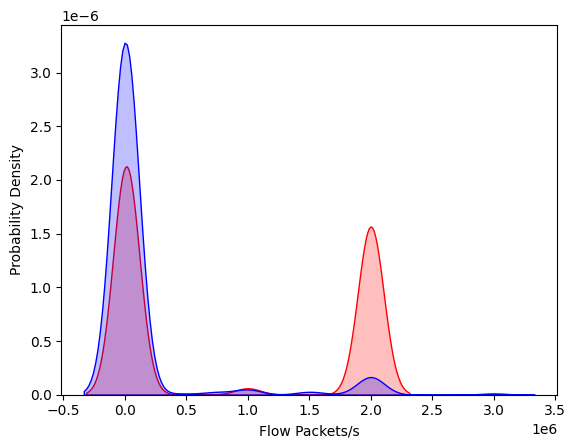

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.kdeplot(df.loc[(df['Label']=='Syn'),
            'Flow Packets/s'], color='r', shade=True, label='Syn')
 
sns.kdeplot(df.loc[(df['Label']=='BENIGN'), 
            'Flow Packets/s'], color='b', shade=True, label='BENIGN')
 
plt.xlabel('Flow Packets/s')
plt.ylabel('Probability Density')

In [93]:
from scipy.stats import normaltest
for i in numeric_features:
    print(f'{i}: {"Not Gaussian" if normaltest(df[i].values,)[1]<0.05 else "Gaussian"}  {normaltest(df[i].values)}')

Fwd Packet Length Mean: Not Gaussian  NormaltestResult(statistic=72045.28510731022, pvalue=0.0)
Fwd Packet Length Std: Not Gaussian  NormaltestResult(statistic=300872.0761927971, pvalue=0.0)
Bwd Packet Length Mean: Not Gaussian  NormaltestResult(statistic=408130.215794713, pvalue=0.0)
Bwd Packet Length Std: Not Gaussian  NormaltestResult(statistic=364653.1254882013, pvalue=0.0)
Flow Bytes/s: Not Gaussian  NormaltestResult(statistic=37666.473047011365, pvalue=0.0)
Flow Packets/s: Not Gaussian  NormaltestResult(statistic=602828.34672299, pvalue=0.0)
Flow IAT Mean: Not Gaussian  NormaltestResult(statistic=55066.088810971574, pvalue=0.0)
Flow IAT Std: Not Gaussian  NormaltestResult(statistic=71656.15616573508, pvalue=0.0)
Fwd IAT Mean: Not Gaussian  NormaltestResult(statistic=49479.35558627501, pvalue=0.0)
Fwd IAT Std: Not Gaussian  NormaltestResult(statistic=70838.79181208511, pvalue=0.0)
Bwd IAT Mean: Not Gaussian  NormaltestResult(statistic=188880.4937991614, pvalue=0.0)
Bwd IAT Std: No

##  Looking at distributions of categorical features

Label
DrDoS_UDP    73958
Syn          68540
BENIGN        1500
Name: count, dtype: int64

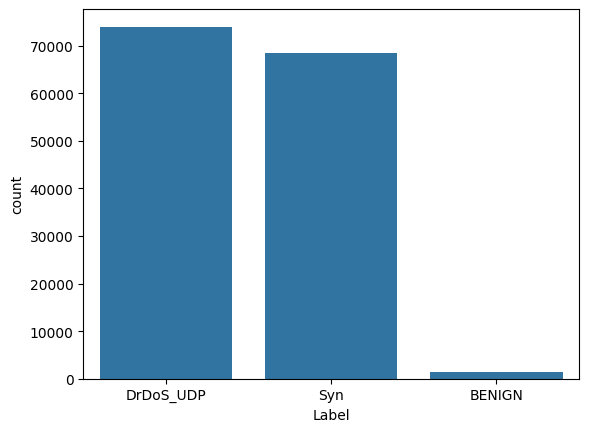

In [94]:
import seaborn as sns
sns.countplot(x=df['Label'])
data['Label'].value_counts()

##  Looking at the relationship between categorical and target features

<Axes: xlabel='Flow Duration', ylabel='Label'>

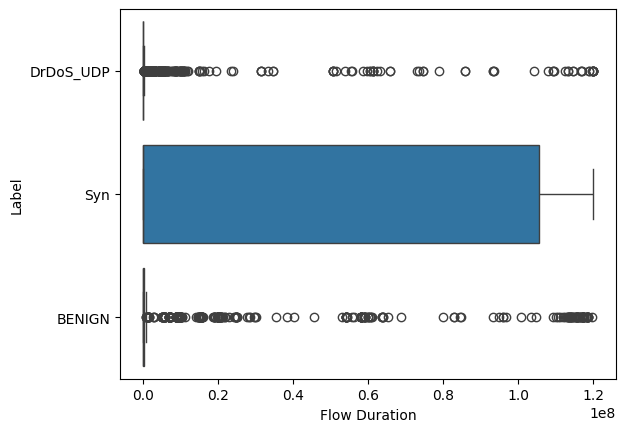

In [95]:
sns.boxplot(x=df[categorical_features[5]],y=df[target])

## Looking at the relationship between numeric and target features

<Axes: >

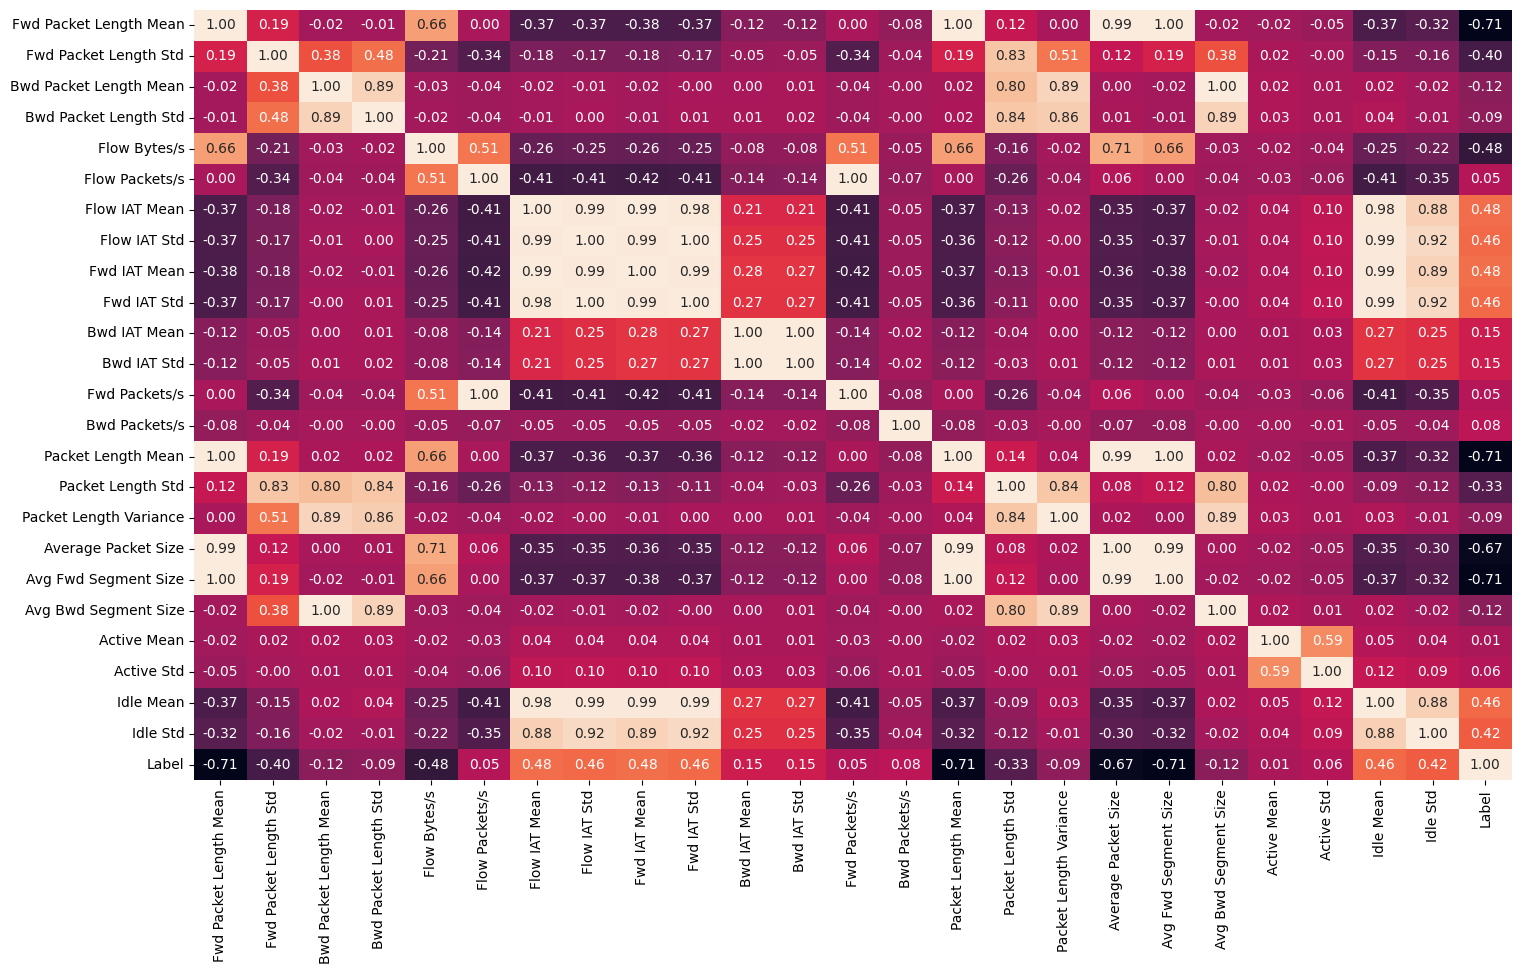

In [96]:
from sklearn.preprocessing import LabelEncoder
num_tgt = numeric_features.copy()
num_tgt.append('Label')
label_en = LabelEncoder()
df['Label'] = label_en.fit_transform(df['Label'])
fig = plt.figure(figsize=(17,10))
sns.heatmap(df[num_tgt].corr(method='pearson'),annot=True,fmt='.2f',cbar=False)